# Welcome to image processing!
Mauricio Cerda, mauricio.cerda@uchile.cl

http://www.scian.cl

Data from Prof. Ulrike Kemmerling Lab (BeWo cell line)

Liempi et al (2015). Trypanosoma cruzi infectivity assessment in “in vitro” culture systems by automated cell counting. Acta Tropica, Volume 143, March 2015, Pages 47-50.
https://www.sciencedirect.com/science/article/abs/pii/S0001706X14003921

--2024-08-21 09:26:35--  https://sasiba.uchile.cl/index.php/s/zKzqsg2ZND7ZUQM/download
Resolving sasiba.uchile.cl (sasiba.uchile.cl)... 200.89.79.35
Connecting to sasiba.uchile.cl (sasiba.uchile.cl)|200.89.79.35|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 178448 (174K) [image/png]
Saving to: ‘chagas2.png’

chagas2.png         100%[===================>] 174.27K  --.-KB/s    in 0.05s   

2024-08-21 09:26:36 (3.47 MB/s) - ‘chagas2.png’ saved [178448/178448]



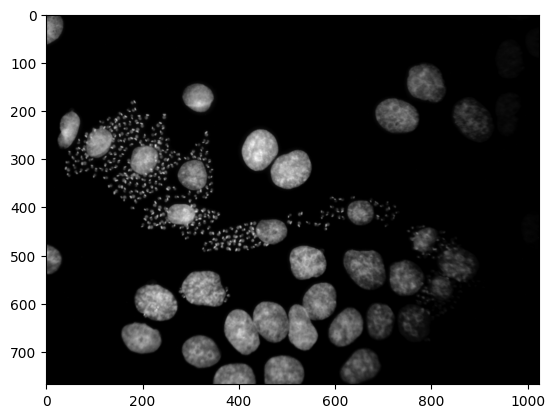

In [3]:
import numpy as np
from matplotlib.pyplot import imshow, subplot, plot
from  skimage import filters, morphology, io, img_as_uint, measure
import scipy.ndimage as snd

!wget --no-check-certificate  https://sasiba.uchile.cl/index.php/s/zKzqsg2ZND7ZUQM/download -O chagas2.png
image=io.imread('chagas2.png')
imshow(image, cmap='gray')

Pick a manual threshold value to segment the image

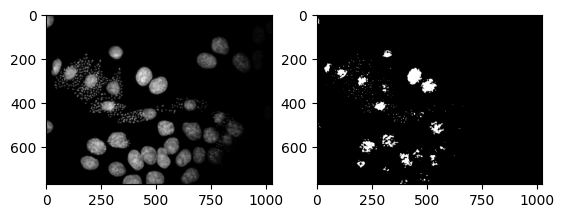

In [4]:
threshold=100

binary=image>threshold

subplot(1,2,1)
imshow(image, cmap='gray')
subplot(1,2,2)
imshow(binary, cmap='gray')

## (a) Pre-process using a convolution to improve segmentation

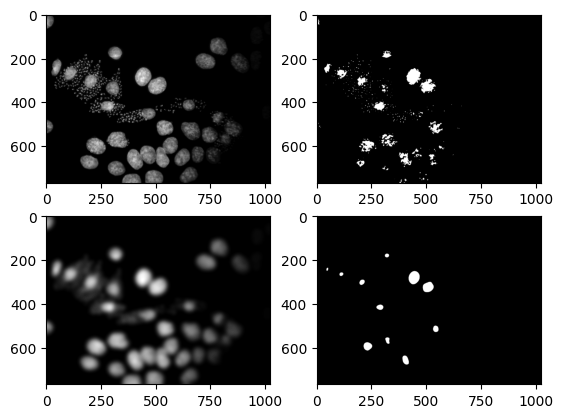

In [5]:
#Modify this code to improve segmentation by using a filter
#the filter could be gaussian or not

#example of how to do a general convolution
#k = np.array([[1/16,1/8,1/16],[1/8,1/4,1/8],[1/16,1/8,1/16]])
#filtered=snd.convolve(image, k)

filtered2=snd.gaussian_filter(image, 9)
binary2=filtered2>threshold

subplot(2,2,1)
imshow(image, cmap='gray')
subplot(2,2,2)
imshow(binary, cmap='gray')
subplot(2,2,3)
imshow(filtered2, cmap='gray')
subplot(2,2,4)
imshow(binary2, cmap='gray')

## (b) Clean out segmentation by using morphological filters

/tmp/ipykernel_9298/2555384452.py:1: DeprecationWarning: Please import `binary_dilation` from the `scipy.ndimage` namespace; the `scipy.ndimage.morphology` namespace is deprecated and will be removed in SciPy 2.0.0.
  dilated=snd.morphology.binary_dilation(binary2, iterations=8)


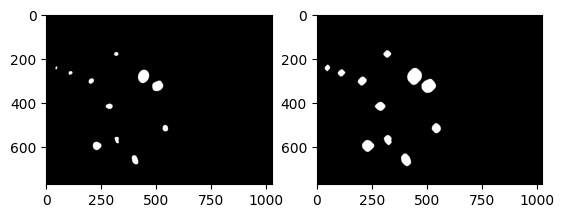

In [6]:
dilated=snd.morphology.binary_dilation(binary2, iterations=8)

subplot(1,2,1)
imshow(binary2, cmap='gray')
subplot(1,2,2)
imshow(dilated, cmap='gray')

## Exercise 1: Compute region properties and color each cell by size
## Exercise 2: Compute region properties and color each cell by elongation (optional)
## Exercise 3: Export results to a table (eg .csv) (optional)

Number of objects=11


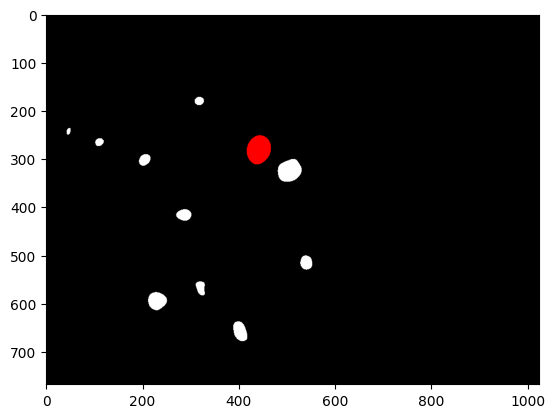

In [7]:
all_labels = measure.label(binary2, background=0)
properties = measure.regionprops(all_labels)
print( 'Number of objects=%s' % len(properties) )

# Make 3 channel RGB image same dimensions
RGB = np.zeros((binary2.shape[0],binary2.shape[1],3), dtype=np.uint8)

RGB[all_labels>0]  = [255,255,255]
RGB[all_labels==3]  = [255,0,0]
imshow(RGB)

#Hint: look at regionprops documentation
#https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_regionprops.html